# Proyecto Final – Parte I  
## **Riesgo de Ca de Tiroides**
### Abstract

El cáncer de tiroides representa uno de los tumores endocrinos más frecuentes a nivel mundial, con una incidencia creciente durante las últimas décadas. Dada su naturaleza multifactorial, su detección temprana y adecuada clasificación del riesgo resultan fundamentales para el pronóstico y tratamiento oportuno.

Este proyecto analiza una base de datos clínicos de pacientes para identificar factores de riesgo asociados al cáncer de tiroides. El dataset contiene variables como edad, género, país, antecedentes familiares, exposición a la radiación, hábitos como tabaquismo u obesidad, y niveles hormonales (TSH, T3 y T4), entre otros. El objetivo principal es explorar cómo se relacionan estos factores con el diagnóstico y con la clasificación de riesgo de cáncer de tiroides (bajo, medio, alto).

A través del análisis exploratorio y visualizaciones multivariadas, se busca identificar patrones relevantes que permitan responder las preguntas planteadas, y validar o rechazar hipótesis sobre los factores que más influyen en el desarrollo de esta patología.





## Preguntas e Hipótesis

### Preguntas:
1. ¿Qué factores están más asociados al riesgo alto de cáncer de tiroides?
2. ¿Hay diferencias en el riesgo según el género o el país?
3. ¿Qué relación existe entre los niveles hormonales (TSH, T3, T4) y el tamaño del nódulo?

### Hipótesis:
- H1: Los pacientes con niveles altos de TSH y nódulos grandes presentan mayor riesgo de cáncer.
- H2: Los pacientes que presentan uno o más factores de riesgo clínicos (antecedente familiar, obesidad, exposición a radiación, deficiencia de yodo, tabaquismo o diabetes) tienden a tener un mayor riesgo de cáncer de tiroides.


In [2]:
import pandas as pd
import requests
from io import BytesIO

# Enlace al archivo .xlsx desde tu repositorio de GitHub
url = "https://github.com/viosofia/datascience/raw/main/Base%20de%20datos%20Riesgo%20de%20Ca%20de%20Tiroides.xlsx"

# Descargar el archivo y cargarlo con pandas
response = requests.get(url)
archivo = BytesIO(response.content)
df = pd.read_excel(archivo)

# Mostrar primeras filas
df.head()


,ID_Paciente,Edad,Genero,País,Antecedente Familiar,Exposición a la radiación,Deficiencia de Yodo,Fumador,Obesidad,Diabetes,Nivel TSH,Nivel T3,Nivel T4,Tamaño del Nódulo,Riesgo de Cáncer de Tiroides,Diagnóstico
0,1,66,Masculino,Rusia,No,Si,No,No,No,No,9.37,1.67,6.16,1.08,Bajo,Benigno
1,2,29,Masculino,Alemania,No,Si,No,No,No,No,1.83,1.73,10.54,4.05,Bajo,Benigno
2,3,86,Masculino,Nigeria,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Bajo,Benigno
3,4,75,Femenino,India,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medio,Benigno
4,5,35,Femenino,Alemania,Si,Si,No,No,No,No,9.10,2.11,10.71,2.11,Alto,Benigno


In [3]:
# Verificar valores nulos
df.isnull().sum()

,0
ID_Paciente,0
Edad,0
Genero,0
País,0
Antecedente Familiar,0
Exposición a la radiación,0
Deficiencia de Yodo,0
Fumador,0
Obesidad,0
Diabetes,0


In [4]:
# Diccionario para mapear "Sí" y "No"
mapeo_binario = {"Si": 1, "No": 0}

# Lista de variables categóricas binarios
variables_binarias = [
    "Antecedente Familiar",
    "Exposición a la radiación",
    "Deficiencia de Yodo",
    "Fumador",
    "Obesidad",
    "Diabetes"
]

# Crear nuevas columnas numéricas
for var in variables_binarias:
    df[var + " Num"] = df[var].map(mapeo_binario)

# Mostrar columnas convertidas para control
df[[var + " Num" for var in variables_binarias]].head()


,Antecedente Familiar Num,Exposición a la radiación Num,Deficiencia de Yodo Num,Fumador Num,Obesidad Num,Diabetes Num
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,0,0,0,0


In [5]:
# Género: Femenino = 0, Masculino = 1
df["Genero Num"] = df["Genero"].map({"Femenino": 0, "Masculino": 1})

# Riesgo de Cáncer: Bajo = 0, Medio = 1, Alto = 2
df["Riesgo Num"] = df["Riesgo de Cáncer de Tiroides"].map({"Bajo": 0, "Medio": 1, "Alto": 2})

# Diagnóstico: Benigno = 0, Maligno = 1
df["Diagnóstico Num"] = df["Diagnóstico"].map({"Benigno": 0, "Maligno": 1})

# Mostrar las nuevas columnas
df[["Genero", "Genero Num", "Riesgo de Cáncer de Tiroides", "Riesgo Num", "Diagnóstico", "Diagnóstico Num"]].head()


,Genero,Genero Num,Riesgo de Cáncer de Tiroides,Riesgo Num,Diagnóstico,Diagnóstico Num
0,Masculino,1,Bajo,0,Benigno,0
1,Masculino,1,Bajo,0,Benigno,0
2,Masculino,1,Bajo,0,Benigno,0
3,Femenino,0,Medio,1,Benigno,0
4,Femenino,0,Alto,2,Benigno,0


In [6]:
# Estadísticas descriptivas para variables numéricas
df.describe()

,ID_Paciente,Edad,Nivel TSH,Nivel T3,Nivel T4,Tamaño del Nódulo,Antecedente Familiar Num,Exposición a la radiación Num,Deficiencia de Yodo Num,Fumador Num,Obesidad Num,Diabetes Num,Genero Num,Riesgo Num,Diagnóstico Num
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403,0.300083,0.149795,0.249272,0.199496,0.30037,0.200258,0.400412,0.640394,0.232708
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631,0.458295,0.356871,0.432593,0.399622,0.45842,0.400194,0.489983,0.728207,0.422559
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,1.000000


##Analisís de la Hipótesis 1 (h1)
H1: Los pacientes con niveles altos de TSH y nódulos grandes presentan mayor riesgo de cáncer.

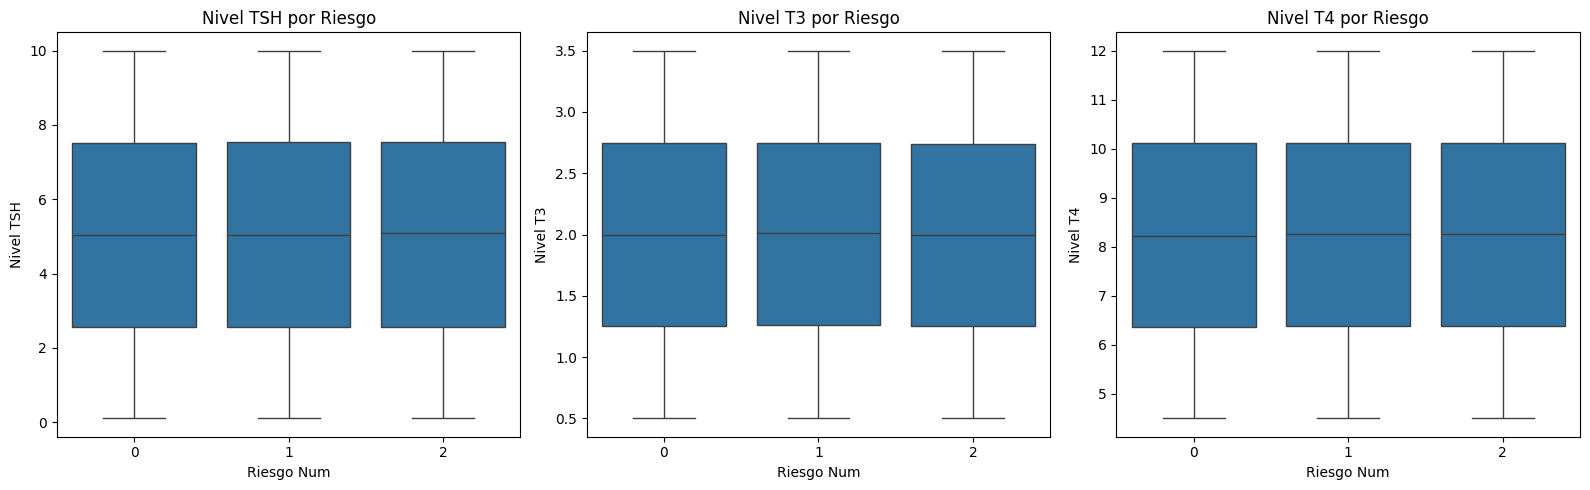

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# TSH
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel TSH")
plt.title("Nivel TSH por Riesgo")

# T3
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel T3")
plt.title("Nivel T3 por Riesgo")

# T4
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Riesgo Num", y="Nivel T4")
plt.title("Nivel T4 por Riesgo")

plt.tight_layout()
plt.show()


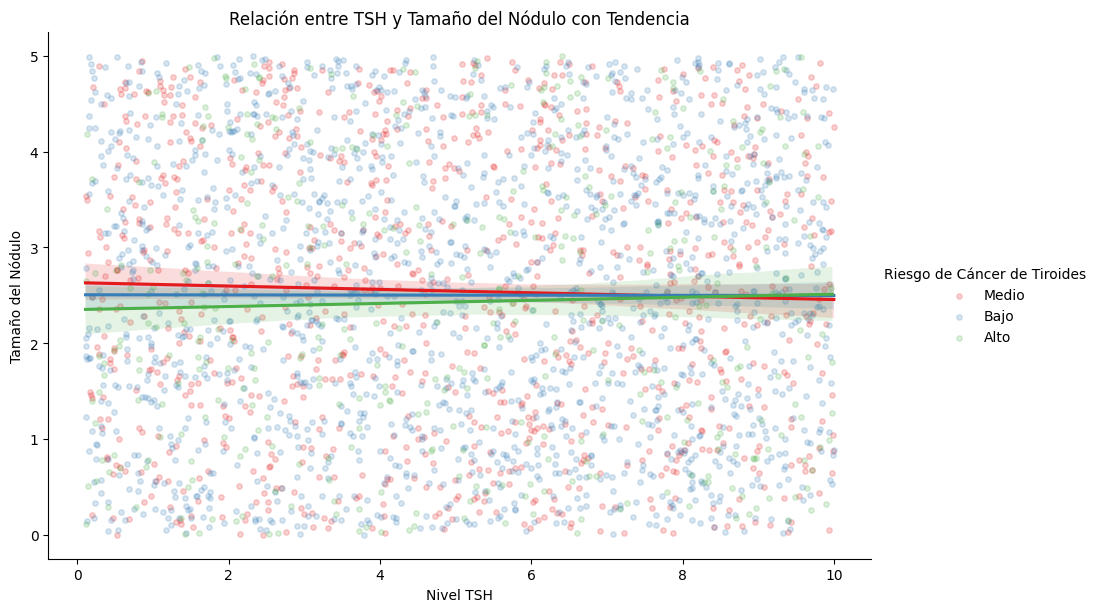

In [10]:
import seaborn as sns

sns.lmplot(
    data=df.sample(3000),
    x="Nivel TSH",
    y="Tamaño del Nódulo",
    hue="Riesgo de Cáncer de Tiroides",
    scatter_kws={"alpha": 0.2, "s": 15},
    height=6,
    aspect=1.5,
    palette="Set1"
)
plt.title("Relación entre TSH y Tamaño del Nódulo con Tendencia")
plt.show()

In [11]:
df[["Nivel TSH", "Tamaño del Nódulo"]].corr()


,Nivel TSH,Tamaño del Nódulo
Nivel TSH,1.000000,0.000416
Tamaño del Nódulo,0.000416,1.000000


## Interpretación

A partir del análisis exploratorio, se observa que **no existe una correlación lineal significativa entre el Nivel de TSH y el Tamaño del Nódulo** (r ≈ 0.0004), lo que sugiere que estas variables **no están relacionadas directamente entre sí** en la muestra total analizada.

Esto **no invalida la hipótesis H1**, pero sí indica que, en general, los pacientes con TSH alto no necesariamente presentan nódulos de mayor tamaño. Es posible que estas variables se comporten de forma independiente o que su relación solo sea visible en subgrupos específicos.

##Analisís de la Hipótesis 2 (h2)
H2: Los pacientes que presentan uno o más factores de riesgo clínicos (antecedente familiar, obesidad, exposición a radiación, deficiencia de yodo, tabaquismo o diabetes) tienden a tener un mayor riesgo de cáncer de tiroides.

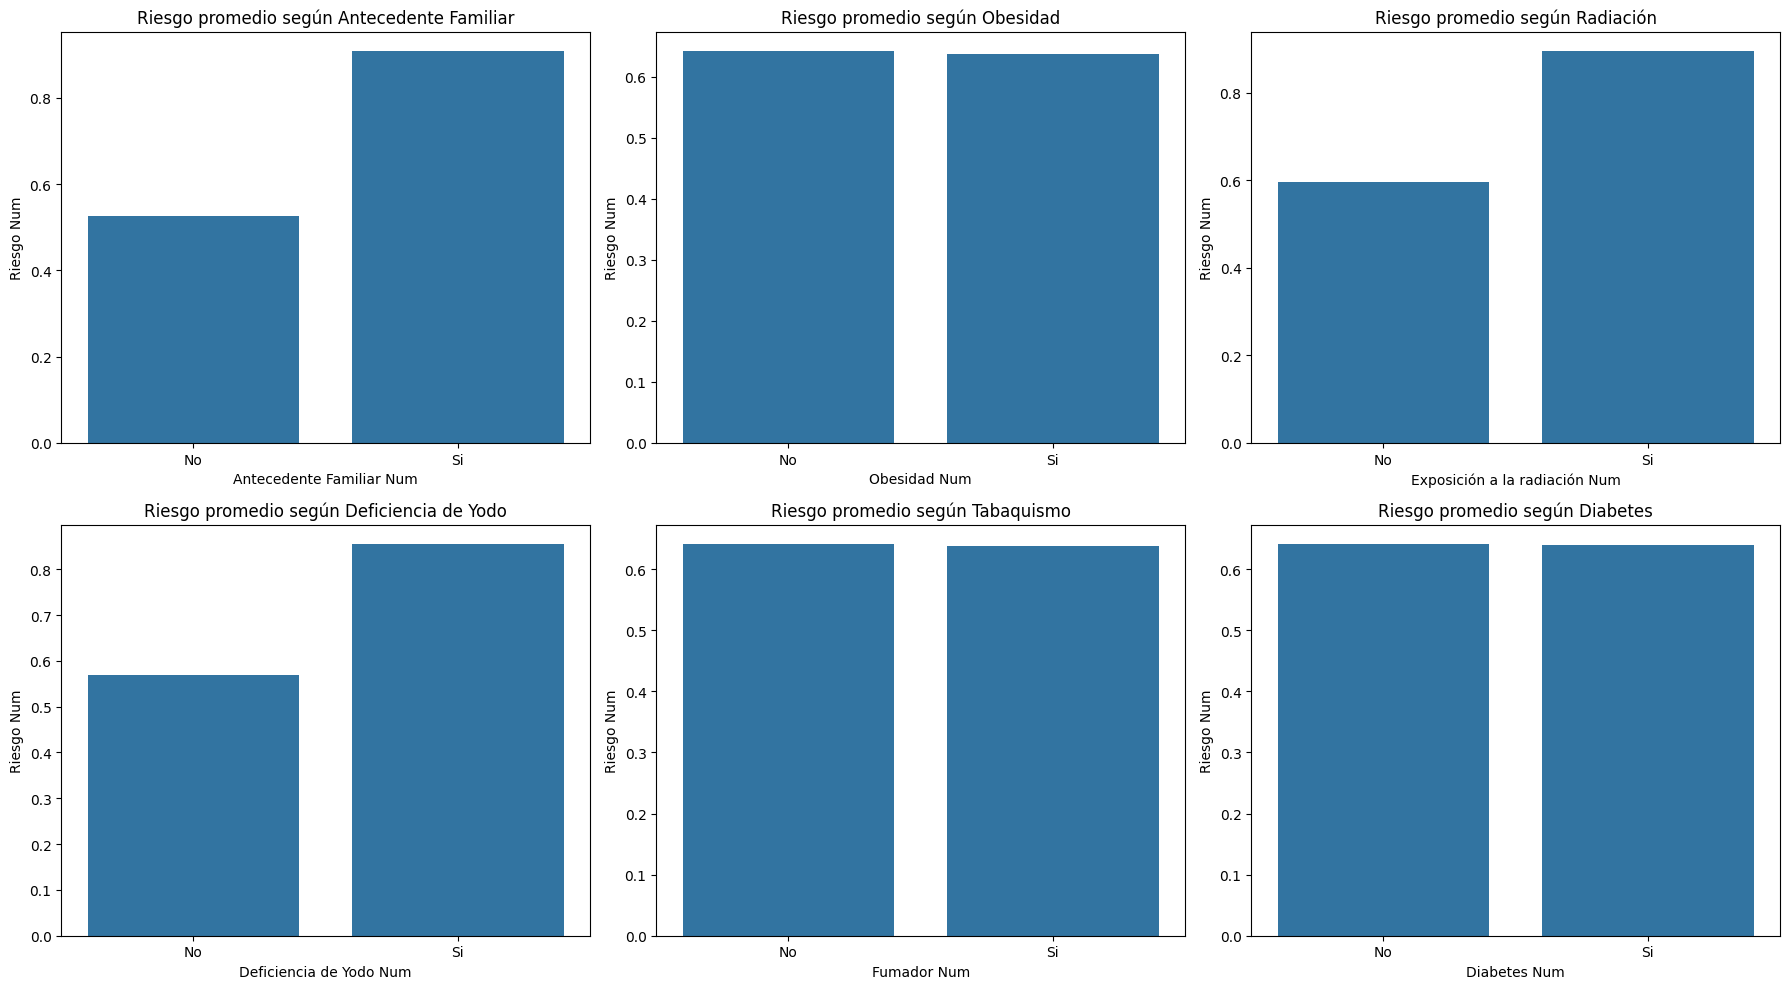

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

factores = [
    ("Antecedente Familiar Num", "Antecedente Familiar"),
    ("Obesidad Num", "Obesidad"),
    ("Exposición a la radiación Num", "Radiación"),
    ("Deficiencia de Yodo Num", "Deficiencia de Yodo"),
    ("Fumador Num", "Tabaquismo"),
    ("Diabetes Num", "Diabetes")
]

plt.figure(figsize=(18,10))

for i, (col, titulo) in enumerate(factores):
    plt.subplot(2, 3, i+1)
    sns.barplot(data=df, x=col, y="Riesgo Num", errorbar=None)
    plt.title(f"Riesgo promedio según {titulo}")
    plt.xticks([0,1], ["No", "Si"])

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

factores = {
    "Antecedente Familiar Num": "Antecedente Familiar",
    "Obesidad Num": "Obesidad",
    "Exposición a la radiación Num": "Radiación",
    "Deficiencia de Yodo Num": "Deficiencia de Yodo",
    "Fumador Num": "Tabaquismo",
    "Diabetes Num": "Diabetes"
}

# Crear una tabla con el riesgo promedio para cada valor (0 = No, 1 = Sí)
resultados = []

for col, nombre in factores.items():
    promedio_no = df[df[col] == 0]["Riesgo Num"].mean()
    promedio_si = df[df[col] == 1]["Riesgo Num"].mean()
    resultados.append({
        "Factor de Riesgo": nombre,
        "Riesgo Promedio (No)": round(promedio_no, 3),
        "Riesgo Promedio (Sí)": round(promedio_si, 3)
    })
# Mostrar como DataFrame
tabla_riesgo = pd.DataFrame(resultados)
print(tabla_riesgo)

       Factor de Riesgo  Riesgo Promedio (No)  Riesgo Promedio (Sí)
0  Antecedente Familiar                 0.526                 0.907
1              Obesidad                 0.642                 0.638
2             Radiación                 0.596                 0.895
3   Deficiencia de Yodo                 0.569                 0.855
4            Tabaquismo                 0.641                 0.638
5              Diabetes                 0.641                 0.639


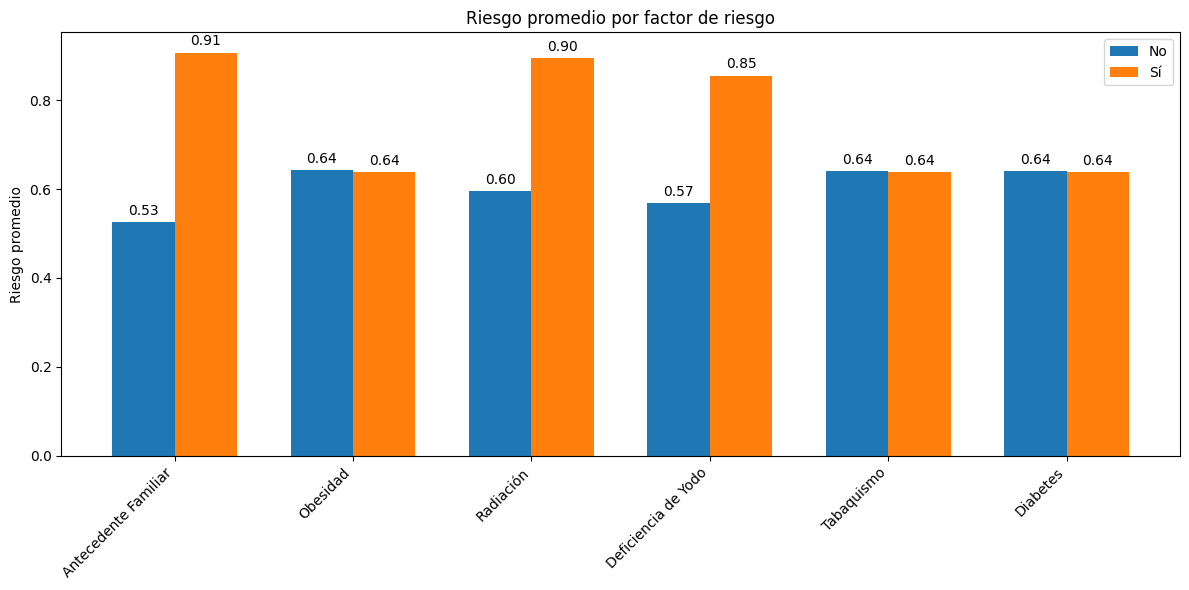

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la tabla previa
factores = tabla_riesgo["Factor de Riesgo"]
riesgo_no = tabla_riesgo["Riesgo Promedio (No)"]
riesgo_si = tabla_riesgo["Riesgo Promedio (Sí)"]

x = np.arange(len(factores))  # posiciones
ancho = 0.35  # ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12,6))
barras1 = ax.bar(x - ancho/2, riesgo_no, width=ancho, label="No")
barras2 = ax.bar(x + ancho/2, riesgo_si, width=ancho, label="Sí")

# Etiquetas y formato
ax.set_ylabel("Riesgo promedio")
ax.set_title("Riesgo promedio por factor de riesgo")
ax.set_xticks(x)
ax.set_xticklabels(factores, rotation=45, ha="right")
ax.legend()

# Mostrar los valores arriba de cada barra
for barras in [barras1, barras2]:
    for bar in barras:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos vertical arriba
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
# Selección de columnas relevantes para calcular la correlación
variables_correlacion = [
    "Riesgo Num", "Antecedente Familiar Num", "Obesidad Num", "Exposición a la radiación Num",
    "Deficiencia de Yodo Num", "Fumador Num", "Diabetes Num"
]

matriz_corr = df[variables_correlacion].corr()
print(matriz_corr["Riesgo Num"].sort_values(ascending=False))


Riesgo Num                       1.000000
Antecedente Familiar Num         0.239961
Deficiencia de Yodo Num          0.169618
Exposición a la radiación Num    0.146727
Diabetes Num                    -0.001021
Fumador Num                     -0.001657
Obesidad Num                    -0.002468
Name: Riesgo Num, dtype: float64


## Interpretación

Se evaluó si los pacientes con distintos factores clínicos codificados como variables binarias tienen un mayor riesgo de cáncer de tiroides.

- **Antecedente Familiar**: El riesgo promedio fue significativamente más alto en pacientes con antecedentes familiares. Y su correlacion con el **Riesgo** marca un r ≈ 0.24
- **Deficiencia de Yodo**: El riesgo promedio fue más alto en pacientes con Deficiencia de Yodo. Y su correlacion con el **Riesgo** marca un r ≈ 0.17
- **Exposición a la radiación**: También mostró un mayor riesgo promedio. Y su correlacion con el **Riesgo** marca un r ≈ 0.15

- **Factores con bajo o nulo impacto aparente**:
  - Tabaquismo, Obesidad y Diabetes: correlación cercana a cero, sin diferencias significativas entre grupos.

La evidencia respalda la **hipótesis H2**. Algunos factores están relacionados con un mayor riesgo y deberían considerarse en decisiones clínicas.

# Análisis de Correlación entre todas las variables

Como parte del análisis exploratorio, se calculó la **matriz de correlación** entre todas las variables numéricas del dataset, incluyendo:

- Variables clínicas (Edad, TSH, T3, T4, Tamaño del Nódulo).
- Factores de riesgo (Antecedente Familiar, Exposición a la Radiación, Obesidad, Deficiencia de Yodo, Fumador, Diabetes.).
- Variables codificadas (Género, Diagnóstico, Riesgo de Cáncer de Tiroides).

### Principales hallazgos:
- La mayoría de las correlaciones entre variables numéricas son **muy débiles** (cercanas a 0).
- Las correlaciones más destacadas se observaron entre:
  - `Antecedente Familiar Num` y `Riesgo Num`: **0.240**
  - `Deficiencia de Yodo Num` y `Riesgo Num`: **0.170**
  - `Exposición a la radiación Num` y `Riesgo Num`: **0.147**
  - `Diagnóstico Num` y `Riesgo Num`: **0.365**

Estas relaciones no son lo suficientemente fuertes como para establecer causalidad, pero sí permiten **hipótesis sobre patrones de riesgo**


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


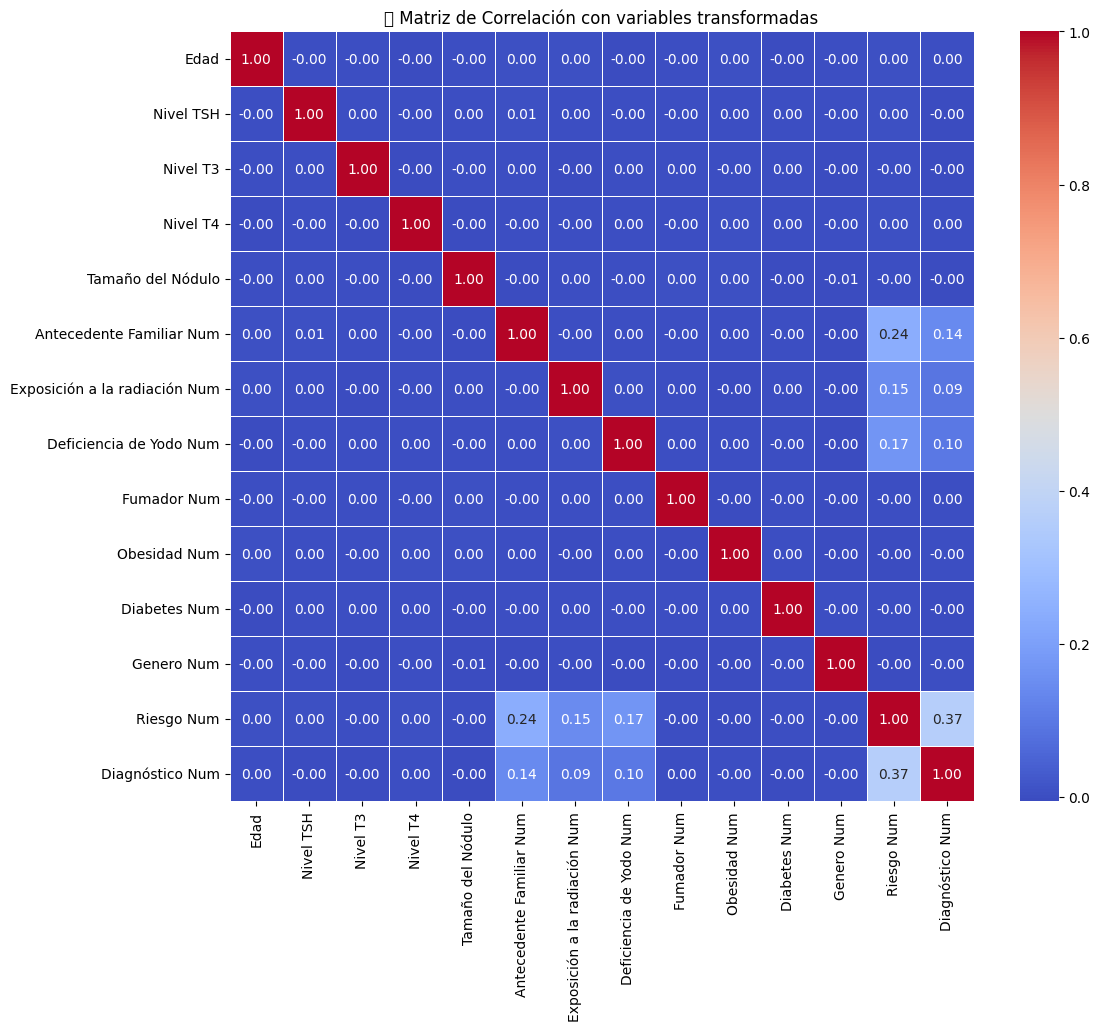

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas para el análisis de correlación
variables_correlacion = [
    "Edad", "Nivel TSH", "Nivel T3", "Nivel T4", "Tamaño del Nódulo",
    "Antecedente Familiar Num", "Exposición a la radiación Num",
    "Deficiencia de Yodo Num", "Fumador Num", "Obesidad Num", "Diabetes Num",
    "Genero Num", "Riesgo Num", "Diagnóstico Num"
]

# Calcular matriz de correlación
matriz_corr = df[variables_correlacion].corr()

# Graficar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔎 Matriz de Correlación con variables transformadas")
plt.show()



In [17]:
# Mostrar matriz de correlación redondeada para copiar
matriz_corr_redondeada = matriz_corr.round(3)

# Mostrar como tabla
print(matriz_corr_redondeada)

                                Edad  Nivel TSH  Nivel T3  Nivel T4  \
Edad                           1.000     -0.001    -0.001    -0.002   
Nivel TSH                     -0.001      1.000     0.000    -0.001   
Nivel T3                      -0.001      0.000     1.000    -0.004   
Nivel T4                      -0.002     -0.001    -0.004     1.000   
Tamaño del Nódulo             -0.001      0.000    -0.002    -0.002   
Antecedente Familiar Num       0.003      0.005     0.001    -0.000   
Exposición a la radiación Num  0.004      0.000    -0.003    -0.000   
Deficiencia de Yodo Num       -0.002     -0.001     0.000     0.001   
Fumador Num                   -0.000     -0.001     0.001    -0.000   
Obesidad Num                   0.002      0.001    -0.001     0.002   
Diabetes Num                  -0.003      0.002     0.002     0.001   
Genero Num                    -0.000     -0.000    -0.003    -0.000   
Riesgo Num                     0.003      0.002    -0.000     0.003   
Diagnó

##**Parte Final**
##Modelado Predictivo
###Objetivos del Modelado

En esta sección se desarrollarán modelos de machine learning con el objetivo de predecir dos variables clave:

1. **Diagnóstico Num**: Clasificación binaria (0: benigno, 1: maligno).
2. **Riesgo Num**: Clasificación multiclase (0: bajo, 1: medio, 2: alto).

Se utilizará un enfoque supervisado con modelos de clasificación, priorizando la interpretabilidad y la evaluación de métricas relevantes como **accuracy, precision, recall y f1-score**. También se evaluará la **importancia de variables (feature importance)** para entender qué factores clínicos aportan más a las predicciones.

Además, se aplicará **validación cruzada** para robustecer los resultados y, si es necesario, técnicas de balanceo de clases como **SMOTE**.


In [29]:
# Filtramos columnas seleccionadas previamente por importancia
variables_diagnostico = ['Nivel TSH', 'Nivel T3', 'Antecedente Familiar Num',
                         'Exposición a la radiación Num', 'Deficiencia de Yodo Num', 'Diabetes Num']
variables_riesgo = ['Nivel T3', 'Antecedente Familiar Num', 'Exposición a la radiación Num',
                    'Deficiencia de Yodo Num', 'Fumador Num', 'Genero Num']

# Definimos variables X (predictoras) e y (targets)
X_diag = df[variables_diagnostico]
y_diag = df['Diagnóstico Num']

X_riesgo = df[variables_riesgo]
y_riesgo = df['Riesgo Num']

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(X_diag, y_diag, test_size=0.3, random_state=42)
X_train_riesgo, X_test_riesgo, y_train_riesgo, y_test_riesgo = train_test_split(X_riesgo, y_riesgo, test_size=0.3, random_state=42)


##**Diagnóstico**


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Aplicar SMOTE sobre los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_diag, y_train_diag)

# Seleccionar características más importantes (k=6) sobre el set balanceado
selector_diag = SelectKBest(score_func=f_classif, k=6)
X_train_sel_diag = selector_diag.fit_transform(X_train_bal, y_train_bal)
X_test_sel_diag = selector_diag.transform(X_test_diag)

# Entrenar modelo con Random Forest sobre el set balanceado y reducido
model_diag_bal = RandomForestClassifier(random_state=42)
model_diag_bal.fit(X_train_sel_diag, y_train_bal)

# Evaluar el modelo sobre el set de test original (no balanceado)
y_pred_diag_bal = model_diag_bal.predict(X_test_sel_diag)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test_diag, y_pred_diag_bal))
print("Precision:", precision_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("Recall:", recall_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("F1 Score:", f1_score(y_test_diag, y_pred_diag_bal, average='binary'))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_diag, y_pred_diag_bal))
print("\nReporte de Clasificación:\n", classification_report(y_test_diag, y_pred_diag_bal))




Accuracy: 0.6503573219658977
Precision: 0.2744399492784252
Recall: 0.306287485679628
F1 Score: 0.2894904458598726

Matriz de Confusión:
 [[36953 12016]
 [10294  4545]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77     48969
           1       0.27      0.31      0.29     14839

    accuracy                           0.65     63808
   macro avg       0.53      0.53      0.53     63808
weighted avg       0.66      0.65      0.66     63808



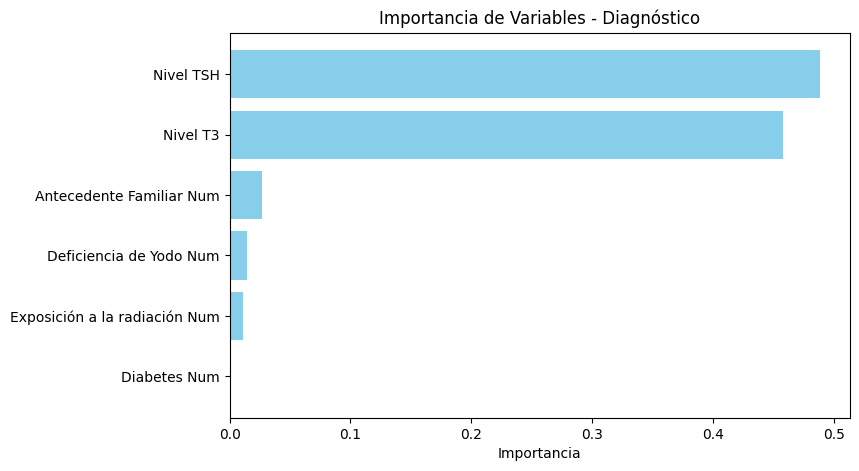

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener importancias
importancias = model_diag_bal.feature_importances_
caracteristicas = np.array(variables_diagnostico)[selector_diag.get_support()]

# Crear DataFrame para mejor visualización
df_importancias = pd.DataFrame({
    'Característica': caracteristicas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(8,5))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Diagnóstico')
plt.gca().invert_yaxis()
plt.show()


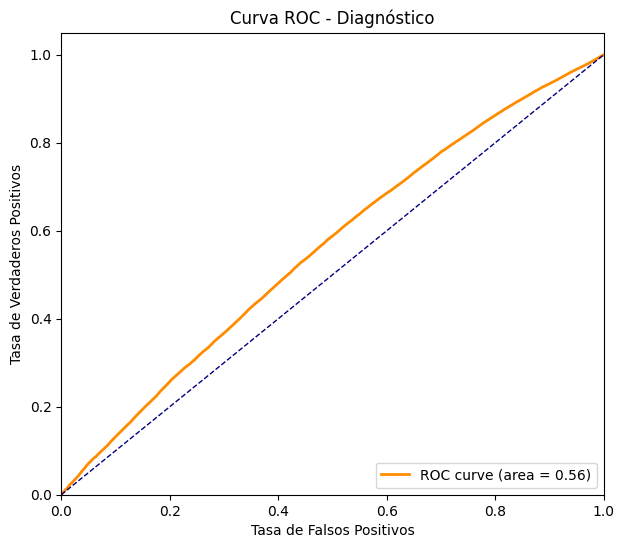

In [37]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_prob_diag = model_diag_bal.predict_proba(X_test_sel_diag)[:, 1]

# Calcular ROC curve
fpr, tpr, thresholds = roc_curve(y_test_diag, y_prob_diag)
roc_auc = auc(fpr, tpr)

# Graficar ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Diagnóstico')
plt.legend(loc="lower right")
plt.show()


##**Riesgo**

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Aplicar SMOTE sobre los datos de entrenamiento de riesgo
smote_riesgo = SMOTE(random_state=42)
X_train_riesgo_bal, y_train_riesgo_bal = smote_riesgo.fit_resample(X_train_riesgo, y_train_riesgo)

# Seleccionar características más importantes (k=6)
selector_riesgo = SelectKBest(score_func=f_classif, k=6)
X_train_sel_riesgo = selector_riesgo.fit_transform(X_train_riesgo_bal, y_train_riesgo_bal)
X_test_sel_riesgo = selector_riesgo.transform(X_test_riesgo)

# Entrenar modelo Random Forest para riesgo
model_riesgo_bal = RandomForestClassifier(random_state=42)
model_riesgo_bal.fit(X_train_sel_riesgo, y_train_riesgo_bal)

# Predecir sobre el set de test original
y_pred_riesgo_bal = model_riesgo_bal.predict(X_test_sel_riesgo)

# Métricas
print("Accuracy:", accuracy_score(y_test_riesgo, y_pred_riesgo_bal))
print("Precision:", precision_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("Recall:", recall_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("F1 Score:", f1_score(y_test_riesgo, y_pred_riesgo_bal, average='weighted'))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_riesgo, y_pred_riesgo_bal))
print("\nReporte de Clasificación:\n", classification_report(y_test_riesgo, y_pred_riesgo_bal))



Accuracy: 0.40078046639919757
Precision: 0.4475137669130529
Recall: 0.40078046639919757
F1 Score: 0.4046427133971917

Matriz de Confusión:
 [[11705 11700  9080]
 [ 7763  7879  6082]
 [ 1895  1715  5989]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.55      0.36      0.43     32485
           1       0.37      0.36      0.37     21724
           2       0.28      0.62      0.39      9599

    accuracy                           0.40     63808
   macro avg       0.40      0.45      0.40     63808
weighted avg       0.45      0.40      0.40     63808



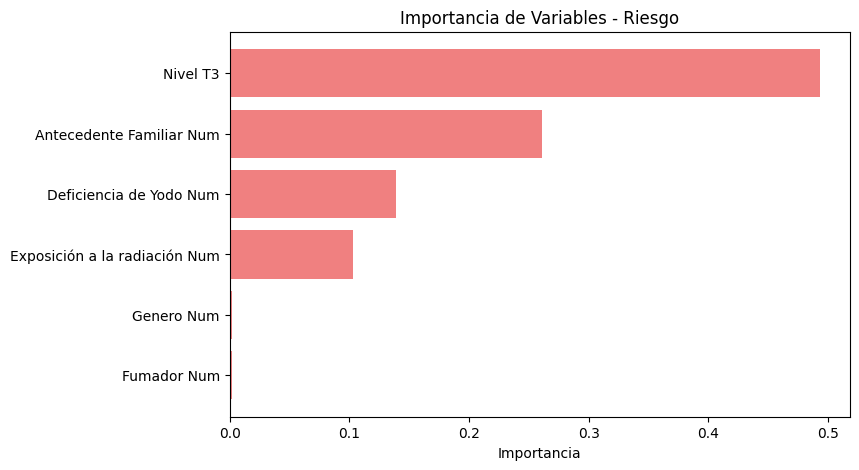

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener importancias
importancias_riesgo = model_riesgo_bal.feature_importances_
caracteristicas_riesgo = np.array(variables_riesgo)[selector_riesgo.get_support()]

# Crear DataFrame
df_importancias_riesgo = pd.DataFrame({
    'Característica': caracteristicas_riesgo,
    'Importancia': importancias_riesgo
}).sort_values(by='Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(8,5))
plt.barh(df_importancias_riesgo['Característica'], df_importancias_riesgo['Importancia'], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Riesgo')
plt.gca().invert_yaxis()
plt.show()


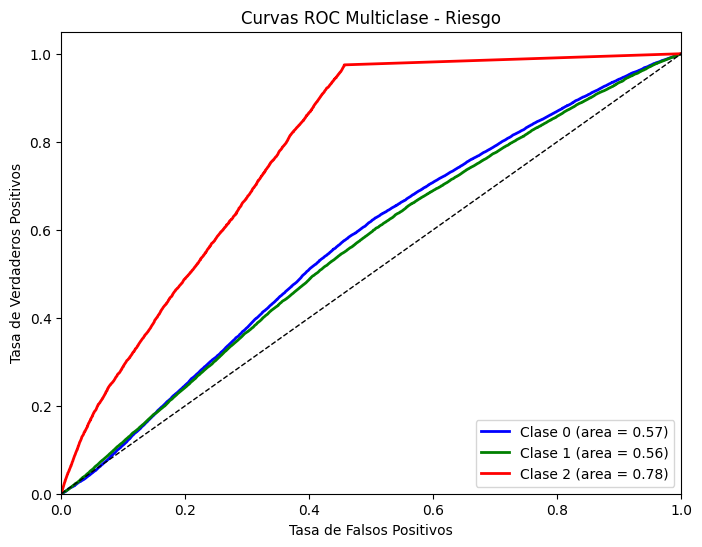

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarizar etiquetas para multiclase
y_test_bin = label_binarize(y_test_riesgo, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Obtener probabilidades
y_score = model_riesgo_bal.predict_proba(X_test_sel_riesgo)

# Calcular ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Multiclase - Riesgo')
plt.legend(loc="lower right")
plt.show()


En este proyecto se analizaron factores clínicos asociados al cáncer de tiroides y se desarrollaron modelos predictivos para clasificar tanto el diagnóstico (benigno o maligno) como el riesgo (bajo, medio o alto).

El análisis exploratorio identificó que antecedentes familiares, deficiencia de yodo y exposición a la radiación son los factores más relacionados con un mayor riesgo de cáncer de tiroides. Por otro lado, variables como tabaquismo, obesidad y diabetes no mostraron una asociación significativa en esta muestra.

Respecto al modelado predictivo, el modelo Random Forest para diagnóstico logró un rendimiento moderado, con una exactitud del 65%, aunque la capacidad para detectar casos malignos sigue siendo limitada debido al desequilibrio en las clases y la complejidad del problema. Las variables más relevantes para la predicción fueron los niveles hormonales TSH y T3.

En cuanto a la predicción del riesgo, el modelo mostró un rendimiento menor, con una exactitud del 40%, indicando que predecir la categoría de riesgo es un desafío mayor. Sin embargo, el modelo identificó que el nivel de T3, antecedentes familiares y exposición a la radiación son variables importantes para esta tarea.

Entre las limitaciones del estudio se destaca el desequilibrio de las clases, que impacta negativamente en la capacidad predictiva de los modelos. Para mejorar los resultados futuros, se recomienda ampliar la base de datos, probar técnicas avanzadas de balanceo, explorar otros algoritmos de machine learning y realizar validación clínica para interpretar los hallazgos.

En conclusión, el proyecto aporta evidencia sobre factores asociados al cáncer de tiroides y presenta un punto de partida para modelos predictivos que podrían ayudar en la toma de decisiones clínicas, aunque es necesario continuar con refinamientos y validaciones adicionales